## Imports

In [1]:
# -*- coding: utf-8 -*-

import cv2
import numpy as np
from matplotlib import pyplot as plt

Installing **pytesseract**, requires **tesseract** to be installed and working on your computer

In [2]:
!pip install pytesseract
import pytesseract

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install imutils
import imutils

Defaulting to user installation because normal site-packages is not writeable


Returns a grayscale image from a given image

In [4]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Removes the noise from an image by using the median blur

In [5]:
# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

Thresholds an image

In [6]:
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

Dilates an image

In [7]:
#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

Erodes an image

In [8]:
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

Applies an opening which is an erosion followed by a dilation

In [9]:
#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

Detects the edges of an image

In [10]:
#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

Detects if an image is rotated

In [11]:
#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

Checks if an image matches a template

In [12]:
#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

## Main program

Defining our image variables

In [13]:
# images vars
img_dir = "./images/";
img_names = {'jaune.png', 'rouge.png', 'vert.jpg', 'violet.png'}

Custom options for tesseract :
- '-c' = set value for config variable
- 'tessedit_char_whitelist=0123456789' = only digits are considered a correct result
- '--oem X' = OCR Engine Mode, see below for more options
- '--psm X' = Page Segmentation Mode, see below for more options

OCR Engine modes:
- 0    Legacy engine only.
- 1    Neural nets LSTM engine only.
- 2    Legacy + LSTM engines.
- 3    Default, based on what is available.

Page segmentation modes:
- 0    Orientation and script detection (OSD) only.
- 1    Automatic page segmentation with OSD.
- 2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
- 3    Fully automatic page segmentation, but no OSD. (Default)
- 4    Assume a single column of text of variable sizes.
- 5    Assume a single uniform block of vertically aligned text.
- 6    Assume a single uniform block of text.
- 7    Treat the image as a single text line.
- 8    Treat the image as a single word.
- 9    Treat the image as a single word in a circle.
- 10    Treat the image as a single character.
- 11    Sparse text. Find as much text as possible in no particular order.
- 12    Sparse text with OSD.
- 13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

In [73]:
# Adding custom options for tesseract
custom_config = r'-c tessedit_char_whitelist=0123456789 --oem 1 --psm 9'

Starting a loop from 1 to 20 which corresponds to each number available in the game

Adding a second loop inside to browse the different tokens' colors

Reads an image thanks to the vars

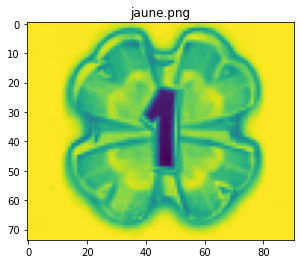

jaune.png(1):


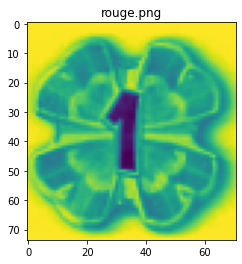

rouge.png(1):


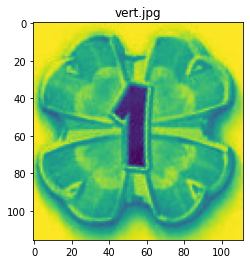

vert.jpg(1):


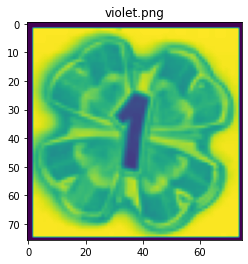

violet.png(1):1



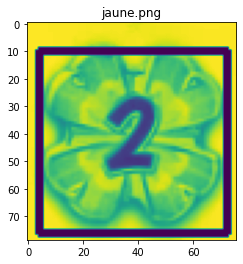

jaune.png(2):2



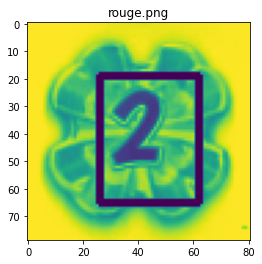

rouge.png(2):2



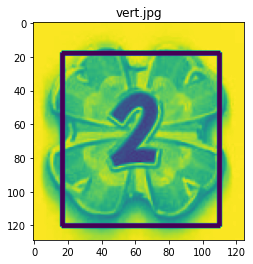

vert.jpg(2):12



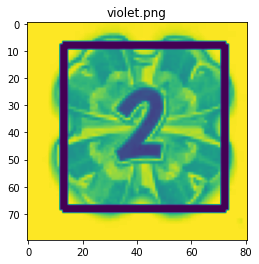

violet.png(2):


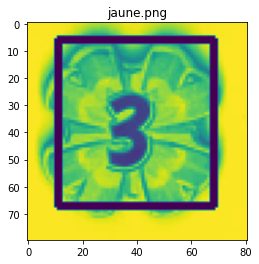

jaune.png(3):2



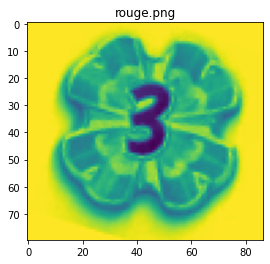

rouge.png(3):


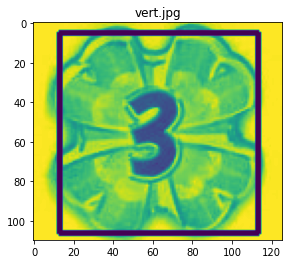

vert.jpg(3):3



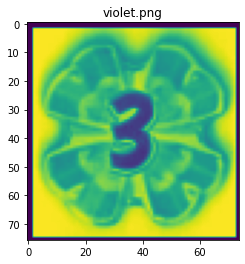

violet.png(3):3



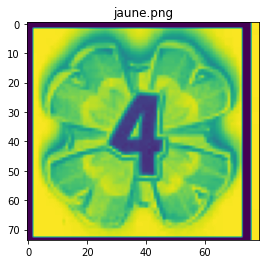

jaune.png(4):4



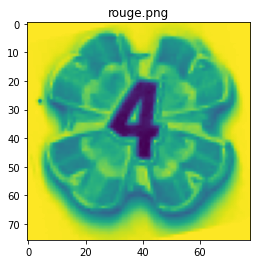

rouge.png(4):


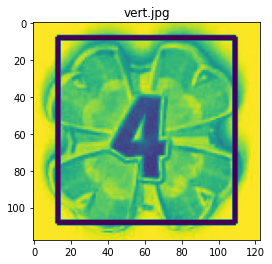

vert.jpg(4):4



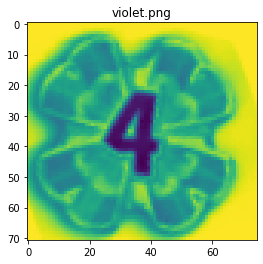

violet.png(4):


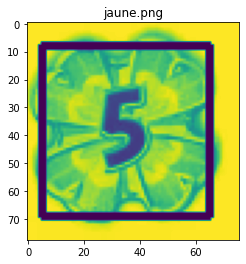

jaune.png(5):5



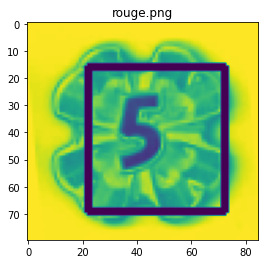

rouge.png(5):


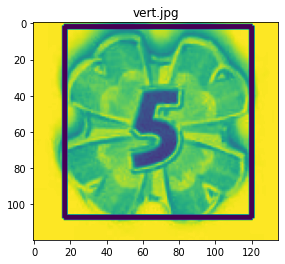

vert.jpg(5):5



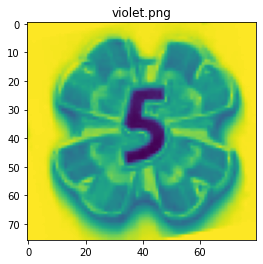

violet.png(5):


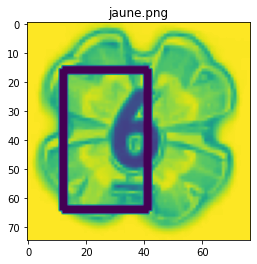

jaune.png(6):4



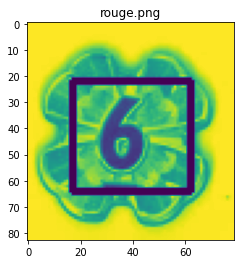

rouge.png(6):6



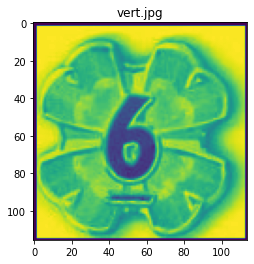

vert.jpg(6):6



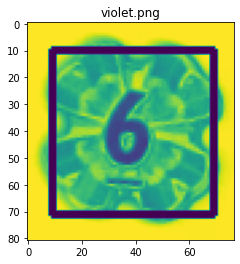

violet.png(6):


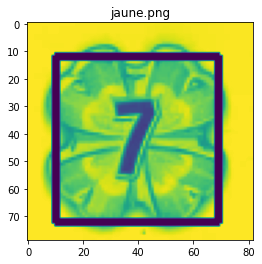

jaune.png(7):7



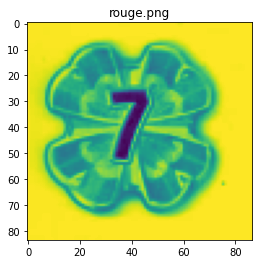

rouge.png(7):


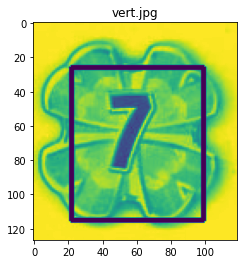

vert.jpg(7):8



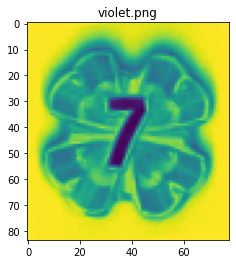

violet.png(7):


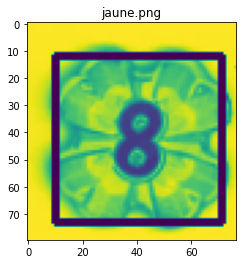

jaune.png(8):


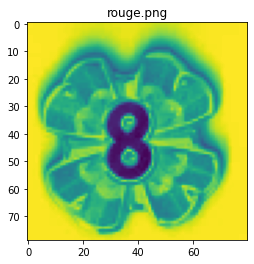

rouge.png(8):


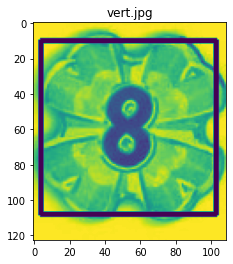

vert.jpg(8):8



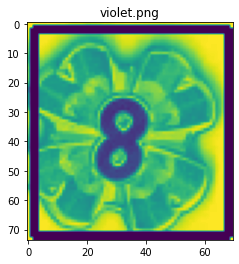

violet.png(8):5



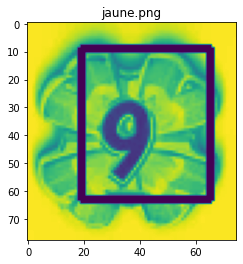

jaune.png(9):


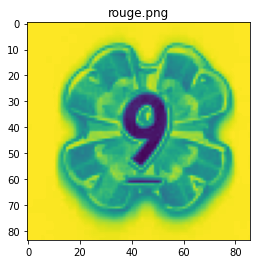

rouge.png(9):


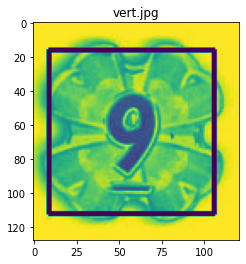

vert.jpg(9):19



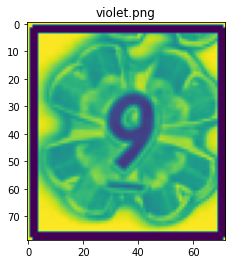

violet.png(9):9



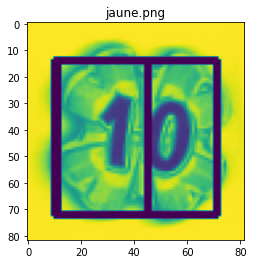

jaune.png(10):


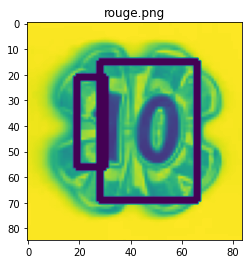

rouge.png(10):19



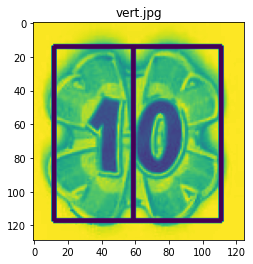

vert.jpg(10):1



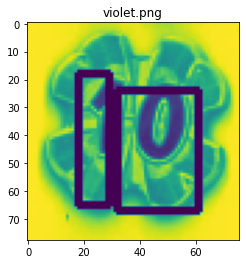

violet.png(10):


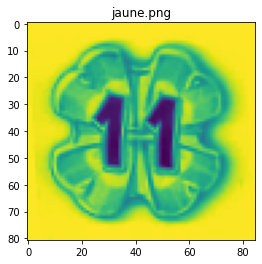

jaune.png(11):


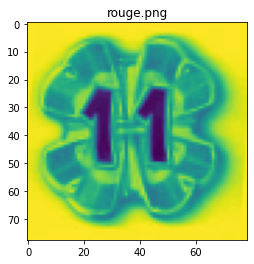

rouge.png(11):


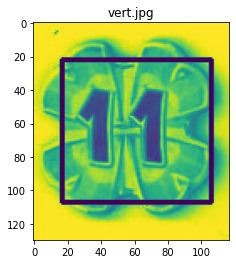

vert.jpg(11):


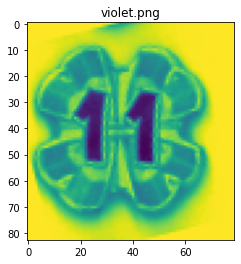

violet.png(11):


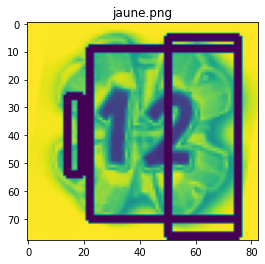

jaune.png(12):13



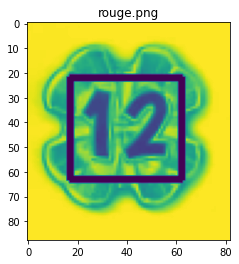

rouge.png(12):12



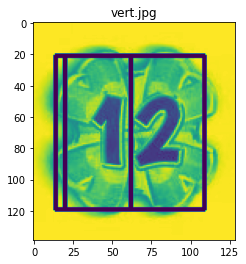

vert.jpg(12):2



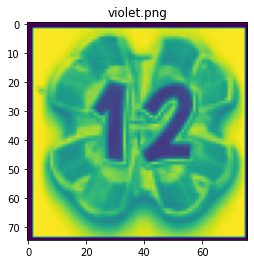

violet.png(12):12



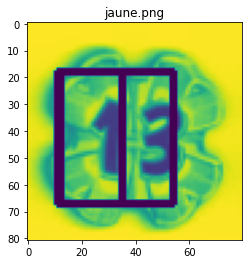

jaune.png(13):


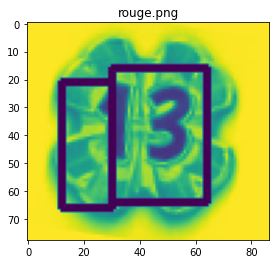

rouge.png(13):13



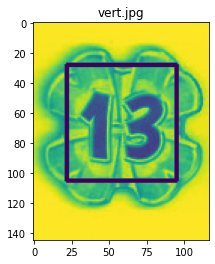

vert.jpg(13):13



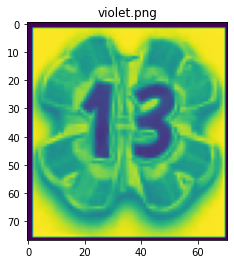

violet.png(13):13



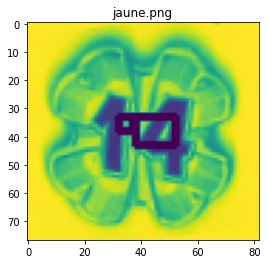

jaune.png(14):4



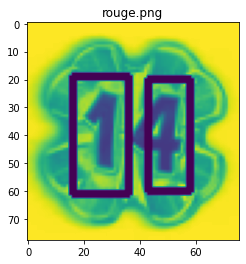

rouge.png(14):11



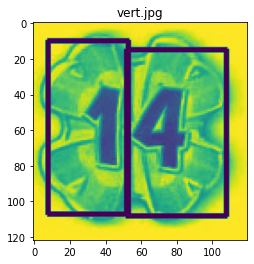

vert.jpg(14):1



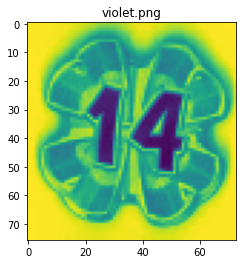

violet.png(14):


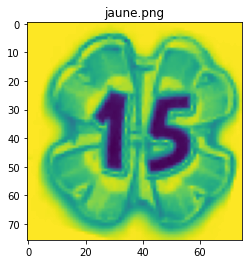

jaune.png(15):


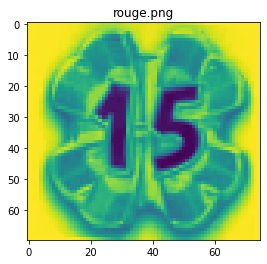

rouge.png(15):


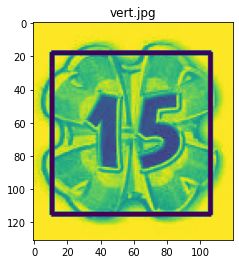

vert.jpg(15):


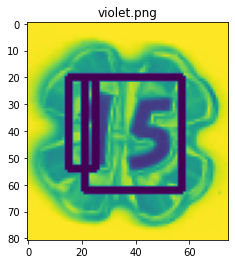

violet.png(15):


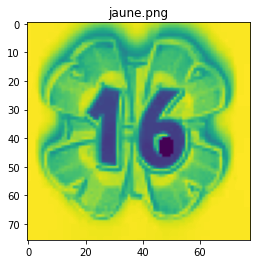

jaune.png(16):


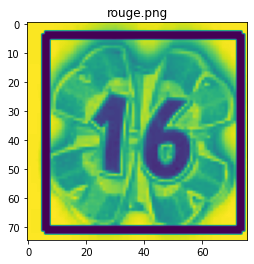

rouge.png(16):


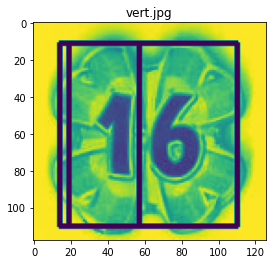

vert.jpg(16):16



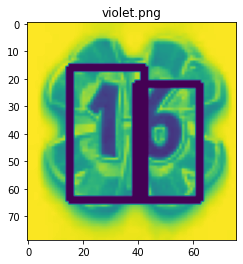

violet.png(16):


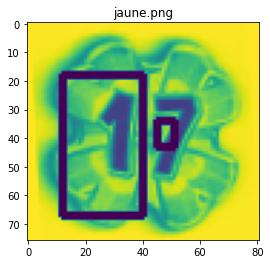

jaune.png(17):


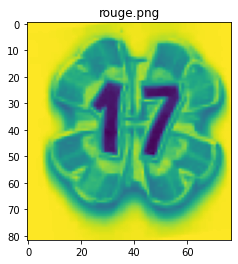

rouge.png(17):


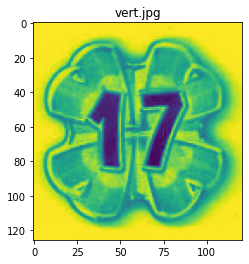

vert.jpg(17):


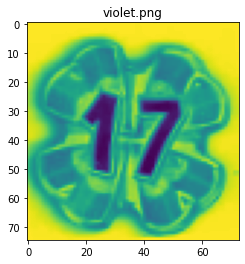

violet.png(17):


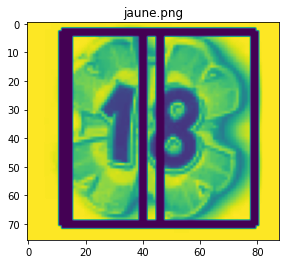

jaune.png(18):1



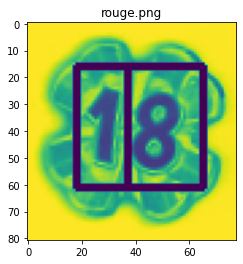

rouge.png(18):


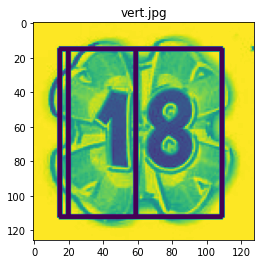

vert.jpg(18):8



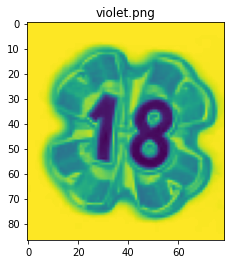

violet.png(18):


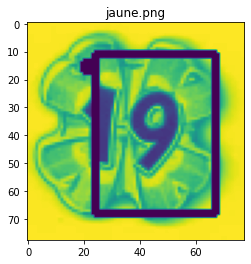

jaune.png(19):9



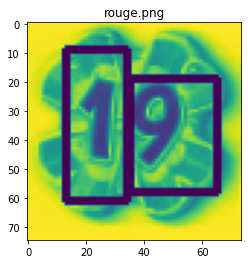

rouge.png(19):13



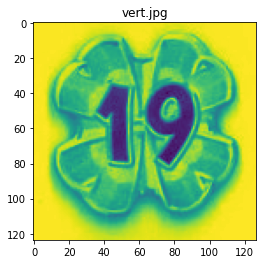

vert.jpg(19):


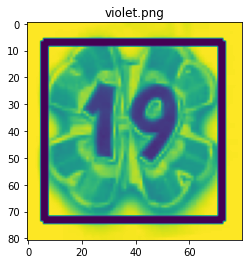

violet.png(19):119



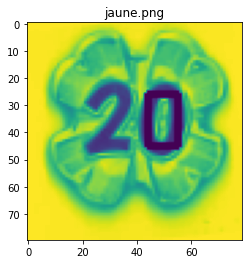

jaune.png(20):0



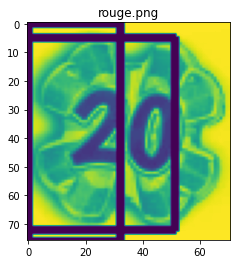

rouge.png(20):


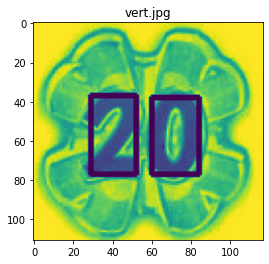

vert.jpg(20):20



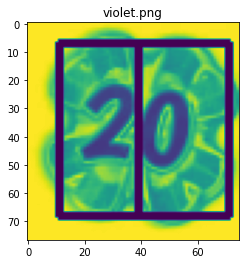

violet.png(20):


In [74]:
for i in range(1, 21):
    for name in img_names: 
        image = cv2.imread(img_dir + str(i) + '/' + str(i) + name)
        
        # split the characters with boxes
        h, w, c = image.shape
        
        img = get_grayscale(image)
        
        boxes = pytesseract.image_to_boxes(img, config=custom_config)
        for b in boxes.splitlines():
            b = b.split(' ')
            img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
            
        plt.imshow(img)
        plt.title(name)
        plt.show()
        
        img_str = pytesseract.image_to_string(img, config=custom_config)
        print(name + '(' + str(i) + '):' + img_str)